<a href="https://colab.research.google.com/github/Vyoma-garg/Deep_Learning/blob/main/4_BatchGD_SGD_Minibatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Batch Gradient Descent 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
url='https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/8_sgd_vs_gd/homeprices_banglore.csv'
df=pd.read_csv(url)
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [3]:
from sklearn import preprocessing

sx= preprocessing.MinMaxScaler()
sy= preprocessing.MinMaxScaler()

x_scaled = sx.fit_transform(df.drop('price', axis='columns'))
x_scaled


array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [12]:
x_scaled.shape, y_scaled.shape

((20, 2), (20, 1))

In [10]:
y_scaled = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))  #(20,) --> (20,1)
y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [13]:
np.ones(shape=2)

array([1., 1.])

In [41]:
def batch_gradient(x,y_true, epochs, learning_rate=0.01):
  number_features=x.shape[1]

  w=np.ones(shape=number_features)
  b=0
  total_samples=x.shape[0]
  
  epoch_list=[]
  cost_list=[]

  for i in range(epochs):
    y_predicted= np.dot(w, x_scaled.T) + b # w1 x area + w2 x bedrooms +bias
    
    w_grad= -(2/total_samples) * (x.T.dot(y_true-y_predicted))
    b_grad= -(2/total_samples) * np.sum(y_true-y_predicted)

    w= w - learning_rate* w_grad
    b= b - learning_rate* b_grad
 
    cost= np.mean(np.square(y_true- y_predicted))   #mse
    
    if i%10==0:
  
      epoch_list.append(i)
      cost_list.append(cost)
    
  return w,b,cost,epoch_list, cost_list


w,b,cost,epoch_list, cost_list = batch_gradient(x_scaled, y_scaled.reshape(y_scaled.shape[0],), 500 )

w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

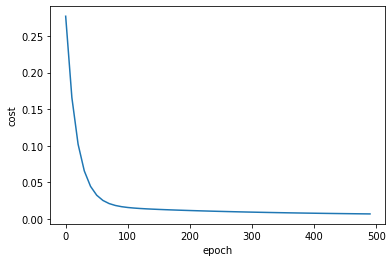

In [23]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

In [28]:
sy.inverse_transform([[1,0]])  #--> max is 167, min is 32


array([[167.,  32.]])

In [37]:
def predict(area, beadrooms, w, b):
  x_scaled= sx.transform([[area, beadrooms]])[0]
  scaled_price= w[0]* x_scaled[0] + w[1]* x_scaled[1] +b

  return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600, 4, w, b)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


128.45484403267596

# Stochastic Gradient Descent

In [38]:
import random 
random.randint(0,6)

3

In [55]:
def batch_gradient(x,y_true, epochs, learning_rate=0.01):
  number_features=x.shape[1]

  w=np.ones(shape=number_features)
  b=0
  total_samples=x.shape[0]
  
  epoch_list=[]
  cost_list=[]

  for i in range(epochs):
    random_index= random.randint(0, total_samples-1)
    sample_x= x[random_index]
    sample_y= y_true[random_index]

    y_predicted= np.dot(w, sample_x.T) + b # w1 x area + w2 x bedrooms +bias
    
    w_grad= -(2/total_samples) * (sample_x.T.dot(sample_y-y_predicted))
    b_grad= -(2/total_samples) * np.sum(sample_y-y_predicted)

    w= w - learning_rate* w_grad
    b= b - learning_rate* b_grad
 
    cost= np.mean(np.square(sample_y- y_predicted))   #mse
    
    if i%100==0:
  
      epoch_list.append(i)
      cost_list.append(cost)
    
  return w,b,cost,epoch_list, cost_list


w_sgd,b_sgd,cost_sgd,epoch_list_sgd, cost_list_sgd = batch_gradient(x_scaled, y_scaled.reshape(y_scaled.shape[0],), 10000 )

w_sgd,b_sgd,cost_sgd  #takes more number of epochs 

(array([0.70663022, 0.67574147]), -0.22953192725761093, 0.010812573473271709)

In [42]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

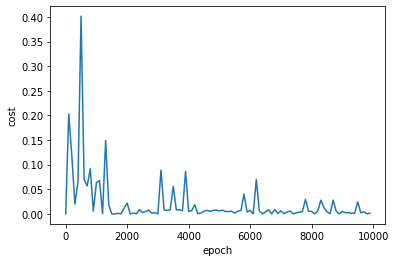

In [56]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd, cost_list_sgd)

In [57]:
predict(2600,4, w_sgd, b_sgd)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


128.64275236304658

# Mini Batch Gradient

In [58]:
np.random.permutation(20)

array([12,  0,  8,  9, 13,  3, 10, 16, 15,  7, 17,  2, 14,  4,  6, 11, 18,
       19,  5,  1])

In [65]:
def batch_gradient(x,y_true, epochs,batch_size = 5, learning_rate=0.01):
  number_features=x.shape[1]

  w=np.ones(shape=number_features)
  b=0
  total_samples=x.shape[0]
  
  epoch_list=[]
  cost_list=[]

  if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
  
  num_batches = int(total_samples/batch_size)

  for i in range(epochs):
    random_indices = np.random.permutation(total_samples)
    X_tmp = x[random_indices]
    y_tmp = y_true[random_indices]
        
    for j in range(0,total_samples,batch_size):
        Xj = X_tmp[j:j+batch_size]
        yj = y_tmp[j:j+batch_size]
        y_predicted = np.dot(w, Xj.T) + b
        
        w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
        b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
            
        cost = np.mean(np.square(yj-y_predicted)) # MSE 

    if i%10==0:

      epoch_list.append(i)
      cost_list.append(cost)
    
  return w,b,cost,epoch_list, cost_list


w_mb,b_mb,cost_mb,epoch_list_mb, cost_list_mb = batch_gradient(x_scaled, y_scaled.reshape(y_scaled.shape[0],), 100 )

w_mb,b_mb,cost_mb  #not more epochs needed

(array([0.72454537, 0.69436606]), -0.24772488313355656, 0.005121598433656307)

In [63]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

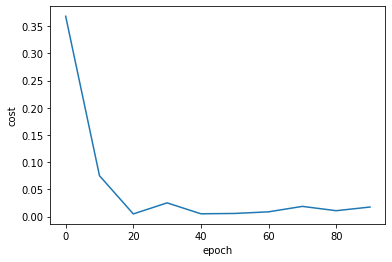

In [66]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mb,cost_list_mb)

In [67]:
predict(2600,4, w_mb, b_mb)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


129.57360937518632